In [1]:
import PIL
import numpy as np

from PIL import Image

CAMERA_LOCATIONS = [
    "Ext Left-Left",
    "Left-Middle",
    "Middle-Right",
    "Right-Ext Right",
    "Ext Right-High Behind Right",
    "High Behind Right-Ext Op Right",
    "Ext Op Right-Op Right",
    "Op Right-Op Middle",
    "Op Middle-Op Left",
    "Op Left-Ext Op Left",
    "Ext Op Left-High Behind Left",
]

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

def show_cams_grid(cam_loc, time_step=0):
    """
    Make a grid for all 10 images for a given camera location
    and display
    """
    imgs = []
    for cam_id in range(9):
        img = Image.open(f"Z:\\students\\slew\\data\\stadium\\{cam_loc}-{cam_id}_0.png")
        imgs.append(img)

    grid = image_grid(imgs, rows=3, cols=3)
    grid.show(title="Cameras for " + cam_loc)

In [ ]:
for i in range(11):
    show_cams_grid(CAMERA_LOCATIONS[i])

In [9]:
def get_cam_id(fname):
    fname_split = fname.rsplit("-", 1)
    frame_loc = fname_split[0]
    fname_split = fname_split[1].split("_")
    cam_id = int(fname_split[0])

    return CAMERA_LOCATIONS.index(frame_loc) * 10 + cam_id

file_names = [cam_loc + "-" + str(cam_id) + "_0.png" for cam_loc in CAMERA_LOCATIONS for cam_id in range(10)]
for fn in file_names:
    print(fn, get_cam_id(fn))

Ext Left-Left-0_0.png 0
Ext Left-Left-1_0.png 1
Ext Left-Left-2_0.png 2
Ext Left-Left-3_0.png 3
Ext Left-Left-4_0.png 4
Ext Left-Left-5_0.png 5
Ext Left-Left-6_0.png 6
Ext Left-Left-7_0.png 7
Ext Left-Left-8_0.png 8
Ext Left-Left-9_0.png 9
Left-Middle-0_0.png 10
Left-Middle-1_0.png 11
Left-Middle-2_0.png 12
Left-Middle-3_0.png 13
Left-Middle-4_0.png 14
Left-Middle-5_0.png 15
Left-Middle-6_0.png 16
Left-Middle-7_0.png 17
Left-Middle-8_0.png 18
Left-Middle-9_0.png 19
Middle-Right-0_0.png 20
Middle-Right-1_0.png 21
Middle-Right-2_0.png 22
Middle-Right-3_0.png 23
Middle-Right-4_0.png 24
Middle-Right-5_0.png 25
Middle-Right-6_0.png 26
Middle-Right-7_0.png 27
Middle-Right-8_0.png 28
Middle-Right-9_0.png 29
Right-Ext Right-0_0.png 30
Right-Ext Right-1_0.png 31
Right-Ext Right-2_0.png 32
Right-Ext Right-3_0.png 33
Right-Ext Right-4_0.png 34
Right-Ext Right-5_0.png 35
Right-Ext Right-6_0.png 36
Right-Ext Right-7_0.png 37
Right-Ext Right-8_0.png 38
Right-Ext Right-9_0.png 39
Ext Right-High Behin

In [6]:
import os
from pathlib import PosixPath
import shutil
from nerfstudio.utils.io import load_from_json
import pathlib
# Fix posixpath for windows
PosixPath = pathlib.WindowsPath
import json

data_dir = PosixPath("Z:\\students\\slew\\data\\paderborn")
# Iterate over folder hbg-imgaes in data_dir
with open((data_dir / "transforms_4cam.json"), encoding="UTF-8") as file:
    jf = json.load(file)
    
    new_jf = {}
    new_frames = []

    frames = jf["frames"]

    hbg = frames[0]
    for i in range(0, 201):
        hbg_new = hbg.copy()
        hbg_new["file_path"] = "images/hbg_" + str(i).zfill(6) + ".png"
        hbg_new["depth_file_path"] = "images/hbg-" + str(i).zfill(6) + "-depth.png"
        new_frames.append(hbg_new)

    left = frames[1]
    for i in range(0, 201):
        left_new = left.copy()
        left_new["file_path"] = "images/left_" + str(i).zfill(6) + ".png"
        left_new["depth_file_path"] = "images/left-" + str(i).zfill(6) + "-depth.png"
        new_frames.append(left_new)

    main = frames[2]
    for i in range(0, 201):
        main_new = main.copy()
        main_new["file_path"] = "images/main_" + str(i).zfill(6) + ".png"
        main_new["depth_file_path"] = "images/main-" + str(i).zfill(6) + "-depth.png"
        new_frames.append(main_new)

    right = frames[3]
    for i in range(0, 201):
        right_new = right.copy()
        right_new["file_path"] = "images/right_" + str(i).zfill(6) + ".png"
        right_new["depth_file_path"] = "images/right-" + str(i).zfill(6) + "-depth.png"
        new_frames.append(right_new)
    
    new_jf["frames"] = new_frames

    # Write new json file
    with open(data_dir / "new.json", "w") as new_file:
        json.dump(new_jf, new_file, indent=4)

    


In [2]:
import os
from pathlib import PosixPath
import shutil
from nerfstudio.utils.io import load_from_json
import pathlib
# Fix posixpath for windows
PosixPath = pathlib.WindowsPath
import json

data_dir = PosixPath("Z:\\students\\slew\\data\\paderborn")
# Iterate over folder hgb-imgaes in data_dir
with open((data_dir / "transforms_4cam.json"), encoding="UTF-8") as file:
    jf = json.load(file)
    
    new_jf = {}
    new_frames = []

    frames = jf["frames"]

    hgb = frames[0]
    for i in range(0, 201):
        hbg_new = hgb.copy()
        hbg_new["file_path"] = "images/hbg_" + str(i).zfill(6) + ".png"
        hbg_new["depth_file_path"] = "depth-maps/hbg_" + str(i).zfill(6) + "-depth.png"
        new_frames.append(hbg_new)

    left = frames[1]
    for i in range(0, 201):
        left_new = left.copy()
        left_new["file_path"] = "images/left_" + str(i).zfill(6) + ".png"
        left_new["depth_file_path"] = "depth-maps/left_" + str(i).zfill(6) + "-depth.png"
        new_frames.append(left_new)

    main = frames[2]
    for i in range(0, 201):
        main_new = main.copy()
        main_new["file_path"] = "images/main_" + str(i).zfill(6) + ".png"
        main_new["depth_file_path"] = "depth-maps/main_" + str(i).zfill(6) + "-depth.png"
        new_frames.append(main_new)

    right = frames[3]
    for i in range(0, 201):
        right_new = right.copy()
        right_new["file_path"] = "images/right_" + str(i).zfill(6) + ".png"
        right_new["depth_file_path"] = "depth-maps/right_" + str(i).zfill(6) + "-depth.png"
        new_frames.append(right_new)
    
    new_jf["frames"] = new_frames

    # Write new json file
    with open(data_dir / "transforms.json", "w") as new_file:
        json.dump(new_jf, new_file, indent=4)

    


In [12]:
# make a list of 10 dummy numbers
dummy = [2*i for i in range(10)]
print(dummy)
indices = [3, 7, 9]
print(indices)
print(np.array(dummy)[indices])

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[3, 7, 9]
[ 6 14 18]


In [1]:
# Process Paderson depth maps

import torch
import numpy as np
import os
import pathlib
pathlib.PosixPath = pathlib.WindowsPath
import shutil
import PIL
from PIL import Image
import cv2

device = "cuda"

data_dir = pathlib.PosixPath("Z:\\students\\slew\\data\\paderborn")
width = 1920
height = 1080

def _loadimg(cam, t):
    img = Image.open(data_dir / "images" / (cam + "_" + str(t).zfill(6) + ".png"))
    img = torch.from_numpy(np.array(img, dtype="uint8").astype("float32") / 255.0)
    return img.to(device)

def _loadmap(cam):
    filepath = data_dir / "depth-maps" / (cam + "_depth.png")
    image = cv2.imread(str(filepath.absolute()), cv2.IMREAD_ANYDEPTH)
    image = image.astype(np.float64)
    image = cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)
    return torch.from_numpy(image).to(device)

cams = ["left", "main", "right"]
t_max = 200
delta_t = 25
for cam in cams:
    for t in range(0, t_max + 1):
        img = _loadimg(cam, t).mean(dim=-1)
        depth_map = _loadmap(cam)

        mov_map = torch.zeros(height, width, device=device)

        # Iterate over frames around (+/- 25) and pay attention to borders of the range
        for i in range(-delta_t, delta_t + 1):
            if t + i < 0 or t + i > t_max:
                continue
            # Get the image and depth map
            adj_img = _loadimg(cam, t + i).mean(dim=-1)
            diff = torch.abs(img - adj_img)
            diff[diff < 0.2] = 0
            mov_map = torch.maximum(mov_map, diff)

        depth_map[mov_map > 0] = 0
        depth_map = depth_map.cpu().numpy().astype(np.uint16)
        kernel = np.ones((5, 5), np.uint8)
        depth_map = cv2.erode(depth_map, kernel, iterations=2)
        cv2.imwrite(str((data_dir / "depth-maps-dyn" / (cam + "_" + str(t).zfill(6) + "-depth.png")).absolute()), depth_map)

In [ ]:
# Process Paderson depth maps

import torch
import numpy as np
import os
import pathlib
pathlib.PosixPath = pathlib.WindowsPath
import shutil
import PIL
from PIL import Image
import cv2

import torchvision.transforms.functional as F
from torchvision.utils import flow_to_image
from torchvision.models.optical_flow import raft_large
from torchvision.models.optical_flow import Raft_Large_Weights
weights = Raft_Large_Weights.DEFAULT
transforms = weights.transforms()
def preprocess(img1_batch, img2_batch):
    img1_batch = F.resize(img1_batch, size=[520, 960], antialias=False)
    img2_batch = F.resize(img2_batch, size=[520, 960], antialias=False)
    return transforms(img1_batch, img2_batch)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = raft_large(weights=Raft_Large_Weights.DEFAULT, progress=False)
model = model.eval()

data_dir = pathlib.PosixPath("Z:\\students\\slew\\data\\paderborn")
width = 1920
height = 1080

def _loadimg(cam, t):
    img = Image.open(data_dir / "images" / (cam + "_" + str(t).zfill(6) + ".png"))
    img = torch.from_numpy(np.array(img, dtype="uint8").astype("float32") / 255.0)
    return img

def _loadmap(cam):
    filepath = data_dir / "depth-maps" / (cam + "_depth.png")
    image = cv2.imread(str(filepath.absolute()), cv2.IMREAD_ANYDEPTH)
    image = image.astype(np.float64)
    image = cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)
    return torch.from_numpy(image)

cams = ["hbg"]
t_max = 200
delta_t = 50
for cam in cams:
    for t in range(0, t_max + 1):
        img = _loadimg(cam, t)
        depth_map = _loadmap(cam)

        mov_map = torch.zeros(height, width)

        # Iterate over frames around (+/- 25) and pay attention to borders of the range
        for i in range(10, delta_t + 1):
            if t + i < 0 or t + i > t_max:
                continue
            # Get the image and depth map
            adj_img = _loadimg(cam, t + i)
            #diff = torch.abs(img - adj_img)
            #diff[diff < 0.5] = 0
            #mov_map = torch.maximum(mov_map, diff)
            
            batch_img1 = img.transpose(1, 2).transpose(0, 1).unsqueeze(0)
            batch_img2 = adj_img.transpose(1, 2).transpose(0, 1).unsqueeze(0)
            batch_img1, batch_img2 = preprocess(batch_img1, batch_img2)
            flow = model(batch_img1, batch_img2)
            break

In [4]:
import torch
import numpy as np
import cv2

filepath = data_dir / "depth-maps" / "main_000121-depth.png"
image = cv2.imread(str(filepath.absolute()), cv2.IMREAD_ANYDEPTH)
print(image)
image = image.astype(np.float64)
image = cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)
T = torch.from_numpy(image).to(device)

[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [2841 2841 2840 ... 2810 2810 2810]
 [2841 2841 2840 ... 2810 2810 2810]
 [2841 2841 2840 ... 2810 2810 2810]]


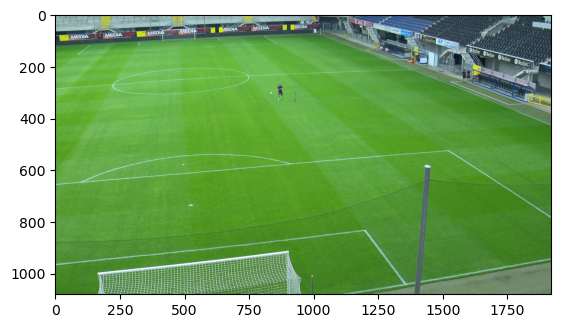

In [61]:
# Process Paderson depth maps

import torch
import numpy as np
import os
import pathlib
pathlib.PosixPath = pathlib.WindowsPath
import shutil
import PIL
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from torchvision.utils import save_image

_COCO_CATEGORIES = [
    "__background__",
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "N/A",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "N/A",
    "backpack",
    "umbrella",
    "N/A",
    "N/A",
    "handbag",
    "tie",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "N/A",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "N/A",
    "dining table",
    "N/A",
    "N/A",
    "toilet",
    "N/A",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "N/A",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]

device = "cpu"
import gc
torch.cuda.empty_cache()
gc.collect()

data_dir = pathlib.PosixPath("Z:\\students\\slew\\data\\paderborn")
width = 1920
height = 1080

def _loadimg(cam, t):
    img = Image.open(data_dir / "images" / (cam + "_" + str(t).zfill(6) + ".png"))
    img = torch.from_numpy(np.array(img, dtype="uint8").astype("float32") / 255.0)
    return img.to(device)

img = _loadimg("hbg", 121)
# show image
plt.imshow(img.cpu().numpy())

# Detect the human on the image
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2
model = fasterrcnn_resnet50_fpn_v2(pretrained=True)
model = model.eval()
model = model.to(device)

# Detect the human on the image
img = img.permute(2, 0, 1)
res = model(img.unsqueeze(0))[0]

# Show bounding boxes on the image
from torchvision.utils import draw_bounding_boxes
# Convert image to uint8
img = img * 255
img = img.byte()

labels = [_COCO_CATEGORIES[label] + " " + str(score.item()) for label, score in zip(res["labels"], res["scores"])]

img = draw_bounding_boxes(img, res["boxes"], labels)
# Save img to disk
save_image(img.float() / 255, "Z:\\students\\slew\\data\\paderborn\\tests\\test.png")

In [ ]:

# Process Paderson depth maps

import torch
import numpy as np
import os
import pathlib
pathlib.PosixPath = pathlib.WindowsPath
import shutil
import PIL
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from torchvision.utils import save_image

_COCO_CATEGORIES = [
    "__background__",
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "N/A",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "N/A",
    "backpack",
    "umbrella",
    "N/A",
    "N/A",
    "handbag",
    "tie",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "N/A",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "N/A",
    "dining table",
    "N/A",
    "N/A",
    "toilet",
    "N/A",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "N/A",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]

device = "cpu"
import gc
torch.cuda.empty_cache()
gc.collect()

data_dir = pathlib.PosixPath("Z:\\students\\slew\\data\\paderborn")
width = 1920
height = 1080

def _loadimg(cam, t):
    img = Image.open(data_dir / "images" / (cam + "_" + str(t).zfill(6) + ".png"))
    img = torch.from_numpy(np.array(img, dtype="uint8").astype("float32") / 255.0)
    return img.to(device)

model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)
model.eval()

img = _loadimg("hbg", 121).permute(2, 0, 1)
plt.imshow(_loadimg("hbg", 121).cpu().numpy())
plt.show()

from torchvision import transforms

T = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
img_batch = T(img).unsqueeze(0)

with torch.no_grad():
    output = model(img_batch)['out'][0]
output_predictions = output.argmax(0)
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy())
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)
plt.show()

In [ ]:
import torch
import numpy as np
import os
import pathlib
import shutil
import PIL
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from torchvision.utils import save_image
from tqdm import tqdm
from segment_anything import build_sam, SamPredictor
pathlib.PosixPath = pathlib.WindowsPath

device = "cuda"

data_dir = pathlib.PosixPath("/students/slew/data/paderborn/")
width = 1920
height = 1080


def _loadimg(cam, t):
    img = Image.open(data_dir / "images/" / "1x" / (cam + "_" + str(t).zfill(6) + ".png"))
    img = torch.from_numpy(np.array(img, dtype="uint8").astype("float32") / 255.0)
    return img.to(device)

def _loadmap(cam):
    filepath = data_dir / "depth-maps-4cam" / "1x" / (cam + "_depth.png")
    image = cv2.imread(str(filepath.absolute()), cv2.IMREAD_ANYDEPTH)
    image = image.astype(np.float64)
    image = cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)
    return torch.from_numpy(image).to(device)

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

img = _loadimg("hbg", 37).permute(2, 0, 1)

ckpt = "/students/slew/sam_ckpts/sam_vit_b_01ec64.pth"

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry['vit_b'](checkpoint=ckpt)
sam.to(device="cuda")

mask_generator = SamAutomaticMaskGenerator(sam)
with torch.no_grad():
    masks = mask_generator.generate(img)
plt.figure(figsize=(20,20))
plt.imshow(img)
show_anns(masks)
plt.axis('off')
plt.show() 
